<a href="https://colab.research.google.com/github/shmilyface/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/LS_DS_131_Stephanie_Miller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [6]:
### YOUR CODE STARTS HERE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random as random

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
df.columns =['party',
         'handicap_infant',
         'water_cost_share',
         'budget_res_adoption',
         'dr_fee_freeze',
         'el_salvador_aid',
         'schools_religious_groups',
         'anti_satellite_ban',
         'nicaraguan_aid',
         'missile',
         'immigration',
         'fuel_corp_cutback',
         'edu_spending',
         'superfund_sue',
         'crime',
         'exports',
         'south_africa_export_admin']
df.head()


,party,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [7]:
'''
adjust columns (header=none)
add column names
deal with null values in a way that doesn't hurt the data
(probably unknown is best)
run a pair plot
test hypotheses of issues

'''
df


,party,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [8]:
df = df.replace(['n', 'y', '?'],[-1,1,0])
df.head()

,party,handicap_infant,water_cost_share,budget_res_adoption,dr_fee_freeze,el_salvador_aid,schools_religious_groups,anti_satellite_ban,nicaraguan_aid,missile,immigration,fuel_corp_cutback,edu_spending,superfund_sue,crime,exports,south_africa_export_admin
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [12]:
df['handicap_infant'].describe()

df.dtypes

party                        object
handicap_infant               int64
water_cost_share              int64
budget_res_adoption           int64
dr_fee_freeze                 int64
el_salvador_aid               int64
schools_religious_groups      int64
anti_satellite_ban            int64
nicaraguan_aid                int64
missile                       int64
immigration                   int64
fuel_corp_cutback             int64
edu_spending                  int64
superfund_sue                 int64
crime                         int64
exports                       int64
south_africa_export_admin     int64
dtype: object

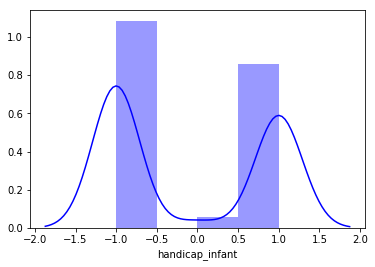

In [56]:
ax=sns.distplot
ax(df['handicap_infant'], color='b')




In [14]:
democrat = df[df['party'] == 'democrat']
democrat = democrat.drop(['party'], axis=1)

republican = df[df['party'] == 'republican']
republican = republican.drop(['party'], axis=1)
print(democrat)

     handicap_infant  water_cost_share  ...  exports  south_africa_export_admin
2                  0                 1  ...       -1                         -1
3                 -1                 1  ...       -1                          1
4                  1                 1  ...        1                          1
5                 -1                 1  ...        1                          1
6                 -1                 1  ...        1                          1
9                  1                 1  ...        0                          0
12                -1                 1  ...        0                          0
13                 1                 1  ...        1                          0
16                 1                -1  ...       -1                          1
17                 1                 0  ...        1                          1
19                 1                 1  ...        1                          1
20                 1                 1  

In [15]:
print(republican)

     handicap_infant  water_cost_share  ...  exports  south_africa_export_admin
0                 -1                 1  ...       -1                          1
1                 -1                 1  ...       -1                          0
7                 -1                 1  ...        0                          1
8                 -1                 1  ...       -1                          1
10                -1                 1  ...       -1                         -1
11                -1                 1  ...        0                          0
14                -1                 1  ...       -1                          0
15                -1                 1  ...       -1                          0
18                -1                 1  ...       -1                         -1
28                 1                -1  ...       -1                          1
30                -1                 1  ...       -1                         -1
33                -1                 1  

In [0]:
dem_sam= democrat.sample(n=20)
rep_sam = republican.sample(n=20)

In [17]:
dem_sam.shape

(20, 16)

In [86]:
print("The sample DF1 Mean:\n\n", dem_sam.mean())
print("\nThe sample DF1 STD:\n\n", dem_sam.std())
print("\nThe sample DF1 VAR:\n\n", dem_sam.var())

The sample DF1 Mean:

 handicap_infant              0.50
water_cost_share            -0.10
budget_res_adoption          0.90
dr_fee_freeze               -1.00
el_salvador_aid             -0.75
schools_religious_groups    -0.30
anti_satellite_ban           0.55
nicaraguan_aid               0.80
missile                      0.55
immigration                  0.05
fuel_corp_cutback           -0.10
edu_spending                -0.90
superfund_sue               -0.85
crime                       -0.60
exports                      0.45
south_africa_export_admin    0.65
dtype: float64

The sample DF1 STD:

 handicap_infant              0.888523
water_cost_share             0.967906
budget_res_adoption          0.447214
dr_fee_freeze                0.000000
el_salvador_aid              0.638666
schools_religious_groups     0.978721
anti_satellite_ban           0.825578
nicaraguan_aid               0.615587
missile                      0.825578
immigration                  0.998683
fuel_corp_cutba

##T Tests

In [61]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

#def dr_ttest(x,y):
  #ttest_ind(dem_sam[x], rep_sam[y])
  #print(dr_ttest(x,y))

ttest_ind(dem_sam['handicap_infant'], rep_sam['handicap_infant'])
f'{budget.pvalue:.20%}'

0.0004125280491456889

In [70]:
#water cost share
water = ttest_ind(dem_sam['water_cost_share'], rep_sam['water_cost_share'])
f'{water.pvalue:.20%}'

'13.12896889277758383230%'

In [69]:
#budget res adoption
budget = ttest_ind(dem_sam['budget_res_adoption'], rep_sam['budget_res_adoption'])
f'{budget.pvalue:.20%}'

'0.00000000034927005247%'

In [71]:
#dr fee freeze
dr_freeze = ttest_ind(dem_sam['dr_fee_freeze'], rep_sam['dr_fee_freeze'])
f'{dr_freeze.pvalue:.20%}'

'0.00000000000000000000%'

In [72]:
#el salvador aid comparison
el_salv = ttest_ind(dem_sam['el_salvador_aid'], rep_sam['el_salvador_aid'])
f'{el_salv.pvalue:.20%}'

'0.00000019997466462208%'

In [73]:
#school religious groups
school_church = ttest_ind(dem_sam['schools_religious_groups'], rep_sam['schools_religious_groups'])
f'{school_church.pvalue:.20%}'

'0.00138154364567798682%'

In [74]:
#anti satellite ban
asb = ttest_ind(dem_sam['anti_satellite_ban'], rep_sam['anti_satellite_ban'])
f'{asb.pvalue:.20%}'

'0.00052093425058890859%'

In [75]:
#nicaraguan aid
nic_aid = ttest_ind(dem_sam['nicaraguan_aid'], rep_sam['nicaraguan_aid'])
f'{nic_aid.pvalue:.20%}'

'0.00001454742234595744%'

In [76]:
#missile
fire_ze_missiles = ttest_ind(dem_sam['missile'], rep_sam['missile'])
f'{fire_ze_missiles.pvalue:.20%}'

'0.00008787876784202881%'

In [77]:
#immigration
gatekeeping = ttest_ind(dem_sam['immigration'], rep_sam['immigration'])
f'{gatekeeping.pvalue:.20%}'

'64.12332381883089738039%'

In [78]:
#fuel corp cutback
fuel = ttest_ind(dem_sam['fuel_corp_cutback'], rep_sam['fuel_corp_cutback'])
f'{fuel.pvalue:.20%}'

'5.90598794703947849172%'

In [79]:
#edu spending
edu_spend = ttest_ind(dem_sam['edu_spending'], rep_sam['edu_spending'])
f'{edu_spend.pvalue:.20%}'

'0.00000012242777797805%'

In [80]:
#superfund sue
supersue = ttest_ind(dem_sam['superfund_sue'], rep_sam['superfund_sue'])
f'{supersue.pvalue:.20%}'

'0.00000000800510217219%'

In [81]:
#crime
criminy = ttest_ind(dem_sam['crime'], rep_sam['crime'])
f'{criminy.pvalue:.20%}'

'0.00001454742234595744%'

In [82]:
#exports
ex_ports = ttest_ind(dem_sam['exports'], rep_sam['exports'])
f'{ex_ports.pvalue:.20%}'

'0.00034611349106892868%'

In [83]:
#south african export admin
saea = ttest_ind(dem_sam['south_africa_export_admin'], rep_sam['south_africa_export_admin'])
f'{saea.pvalue:.20%}'

'9.16324709236786993927%'



---



**Challenge**

Write Python functions to calculate both the number of combinations and the number of permutations for given $n$ and $k$ (yes, these functions definitely exist out there - code your own, and compare!).

In [0]:
#only need n since we define fact in the function
#factorial will always be 1
def combo_attack(n):
  fact = 1
#i stands for whatever the current value in the range is right now
  for i in range(1, n+1):
    fact = fact*i
  return fact

#premutation test
def numb_perm(n,k):
  #n!/k!(n-k)!
  numb = combo_attack(n)/combo_attack(k) * (combo_attack(n-k))
  return numb

print(numb_perm(9,2))

**Challenge**


Using scipy.stats.ttest_1samp, perform a t-test on the above scenario, with the following data as input:

Copy

[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
 1, 0, 1, 0, 1, 1, 0, 0, 0]

This list represents 50 respondents to the survey, where a 1 indicates preference for Pepsi and a 0 indicates preferences for Coke.

After you perform the test, try to interpret your results - one hint is that, for most statistical tests, a larger test statistic means more “significant” or unusual results.

In [0]:
import scipy.stats

scipy.stats.ttest_1samp([], popmean='array-like')